# Understand ROCKET transform

In [1]:
from rocket_functions import *

import matplotlib.pyplot as plt
import pandas as pd

from datasets import Dataset
from param import *

datalist = ParamDir().data_path_list

In [2]:
dataset = Dataset(datalist[0], 1.0, False)
(X_train, y_train), (X_test, y_test) = dataset.load_all_data(10, .8)

Text(0, 0.5, 'position')

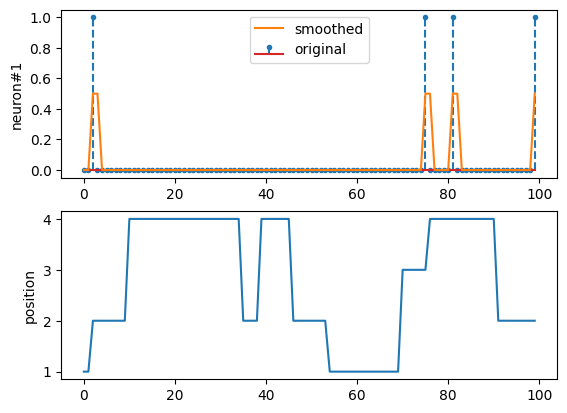

In [27]:
(X, y) , (_, _) = dataset.split_data(dataset.spikes, dataset.coords_xy, .8)
y = dataset._discretize_coords()
X_smooth = dataset._filter_spikes(10, X) 

fig, axes = plt.subplots(nrows=2)
axes[0].stem(range(len(X[:100,0])), X[:100,0], linefmt="--", markerfmt=".", label="original")
axes[0].plot(X_smooth[:100,0], label="smoothed")
axes[0].legend()
axes[0].set_ylabel("neuron#1")

axes[1].plot(y[:100])
axes[1].set_ylabel("position")


In [30]:
# it takes univariate input
X_training = np.array([i.values for i in X_train.iloc[:,0].values])

# generate random kernels
kernels = generate_kernels(X_training.shape[-1], 10_000)

# transform training set and train classifier
X_training_transform = apply_kernels(X_training, kernels)

In [50]:
X_training.shape

(125, 75)

In [49]:
# n_instances X time points
from numba import prange, vectorize
@vectorize("float64(float64,float64)", nopython=True, cache=True)
def _PPV(a, b):
    if a > b:
        return 1
    else:
        return 0

_PPV(X_training, 0).mean()

0.014613333333333334

In [34]:
# n_instances X n_kernels*2
X_training_transform.shape

(125, 20000)